In [2]:
import risk
reload(risk)

<module 'risk' from 'risk.pyc'>

In [9]:
import random, numpy, math, os
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
regions = graph.regions()

In [77]:
random.sample(regions, 10)

[Region(eastern-australia),
 Region(congo),
 Region(new-guinea),
 Region(irkutsk),
 Region(central-america),
 Region(ural),
 Region(argentina),
 Region(eastern-united-states),
 Region(peru),
 Region(western-united-states)]

In [81]:
def full_continents(my_regions):
    retval = [ ]
    for continent, regions in risk.continents.items():
        n_regions = len(regions)
        n_my_regions = len([r for r in my_regions if r.continent() == continent])
        if n_regions == (n_my_regions):
            retval.append(continent)
    return retval
def new_armies(my_regions):
    retval = max(3, int(math.floor(len(my_regions)/3)))
    for continent in full_continents(my_regions):
        retval += risk.continent_bonus[continent]
    return retval

In [103]:
def safe_nodes(my_regions):
    retval = 0
    for r in my_regions:
        safe = True
        for n in r.neighbors():
            if not n in [x.name for x in my_regions]:
                safe = False
                break
        retval += safe
    return retval

In [104]:
new_armies(random.sample(regions, 42))

38

In [105]:
safe_nodes(random.sample(regions, 42))

42

In [ ]:
plt.hist([safe_nodes(random.sample(regions, 30)) for i in range(10000)], bins=10)
    

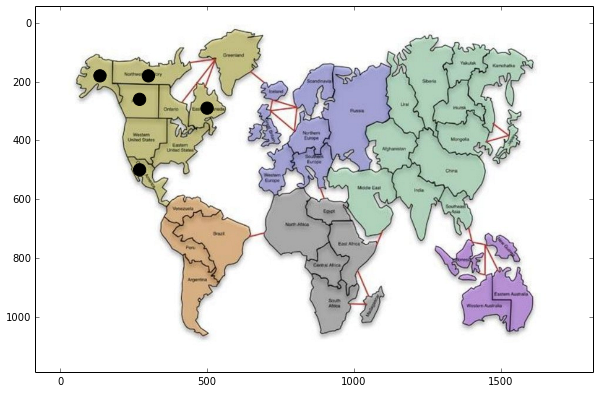

In [59]:
im = plt.imread(os.getcwd() + '/risk.png')
plt.figure(figsize = (10,15))
implot = plt.imshow(im)
plt.scatter([135], [180], s = 150, c = 'black') # alaska
plt.scatter([300], [180], s = 150, c = 'black') # northern territory
plt.scatter([270], [260], s = 150, c = 'black') # alberta
plt.scatter([270], [500], s = 150, c = 'black') # mexico
plt.scatter([500], [290], s = 150, c = 'black') # mexico
plt.show()